## Facets
Facets let you split plots into multiple panes, each displaying subsets of the dataset. Here you'll learn how to wrap facets and arrange them in a grid, as well as providing custom labeling.

### Facet layer basics
Faceting splits the data up into groups, according to a categorical variable, then plots each group in its own panel. For splitting the data by one or two categorical variables, facet_grid() is best.

Given categorical variables A and B, the code pattern is

plot + facet_grid(rows = vars(A), cols = vars(B))

This draws a panel for each pairwise combination of the values of A and B.

Here, we'll use the mtcars data set to practice. Although cyl and am are not encoded as factor variables in the data set, ggplot2 will coerce variables to factors when used in facets.

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

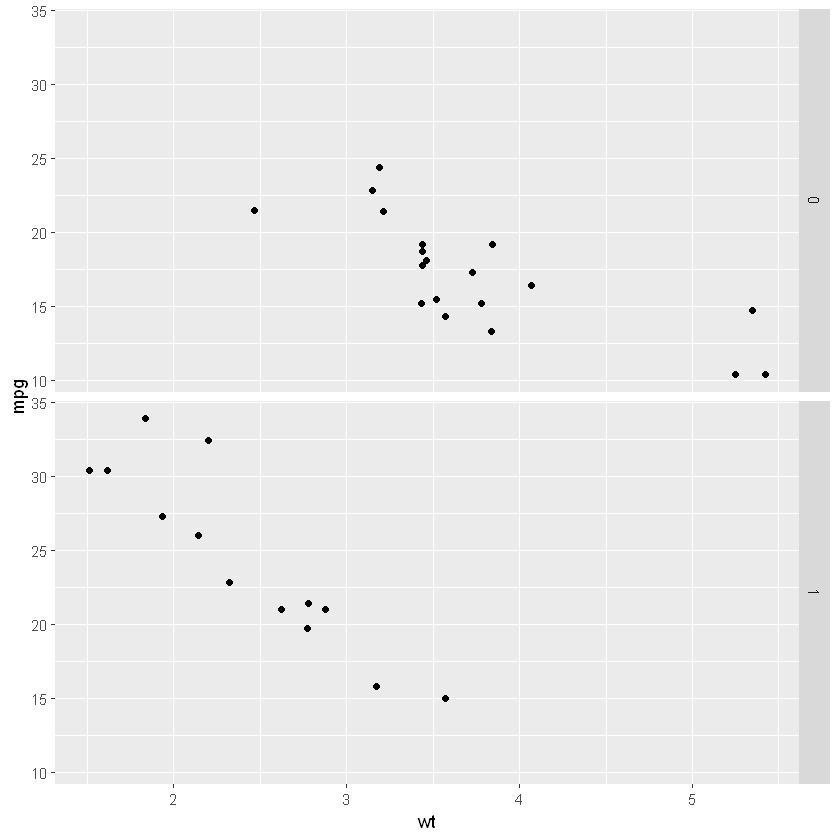

In [1]:
library(ggplot2)

ggplot(mtcars, aes(wt, mpg)) + 
  geom_point() +
  # Facet rows by am
  facet_grid (rows = vars(am))

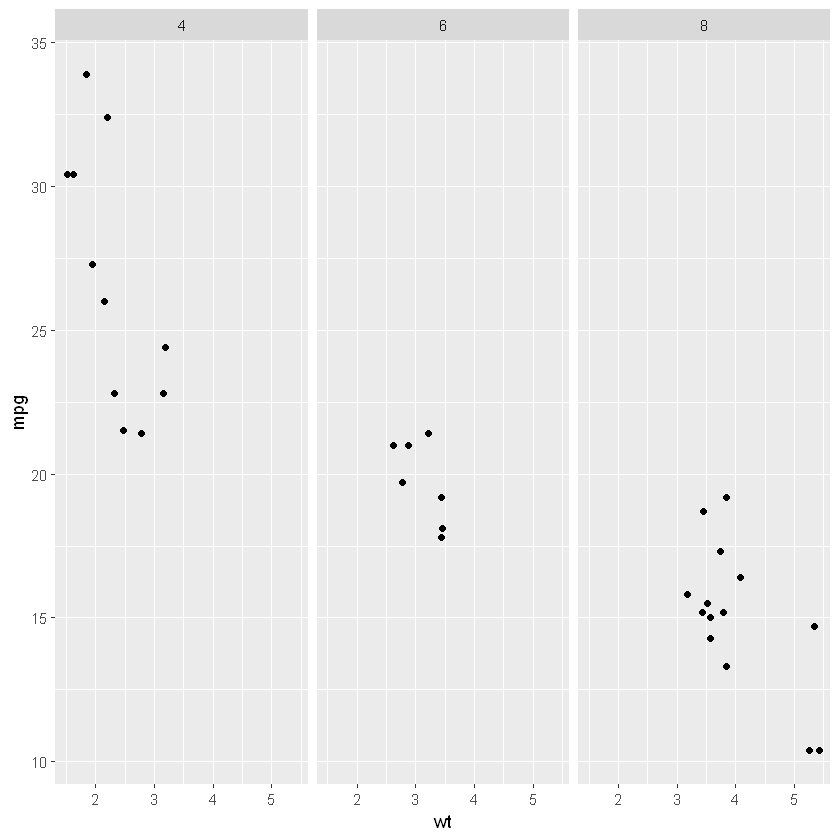

In [3]:
ggplot(mtcars, aes(wt, mpg)) + 
  geom_point() +
  # Facet columns by cyl
  facet_grid (cols = vars(cyl))

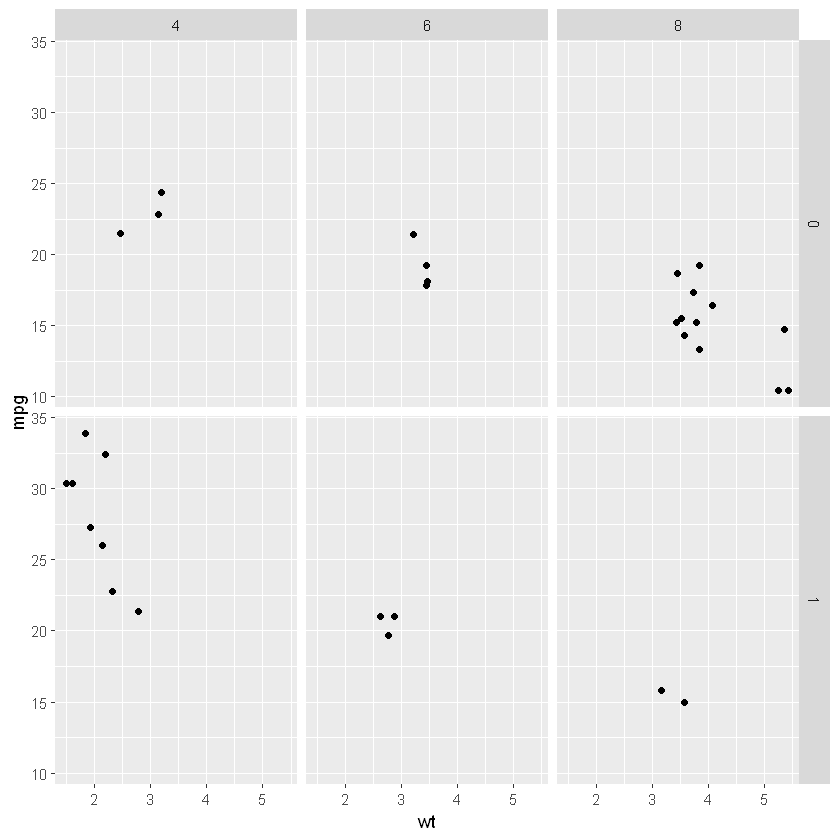

In [4]:
# join!
ggplot(mtcars, aes(wt, mpg)) + 
  geom_point() +
  # Facet rows by am and columns by cyl
   facet_grid (rows = vars(am),cols = vars(cyl))

### Many variables
In addition to aesthetics, facets are another way of encoding factor (i.e. categorical) variables. They can be used to reduce the complexity of plots with many variables.

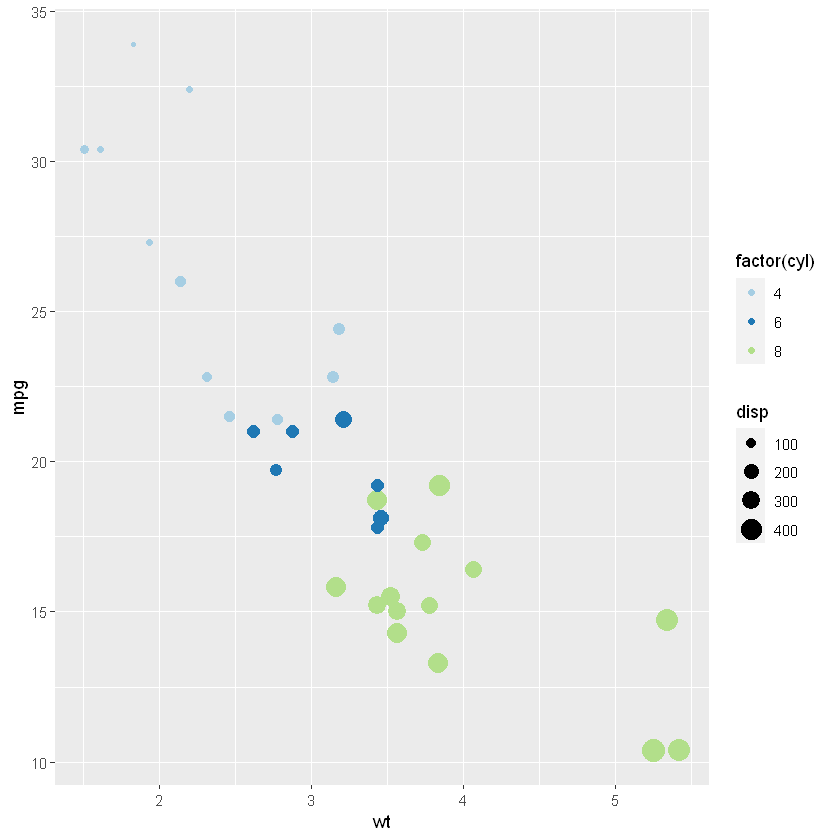

In [5]:
# Update the plot to map disp to size
ggplot(mtcars, aes(x = wt, y = mpg, color = factor(cyl), size = disp)) +
  geom_point() +
  scale_color_brewer(palette = "Paired")

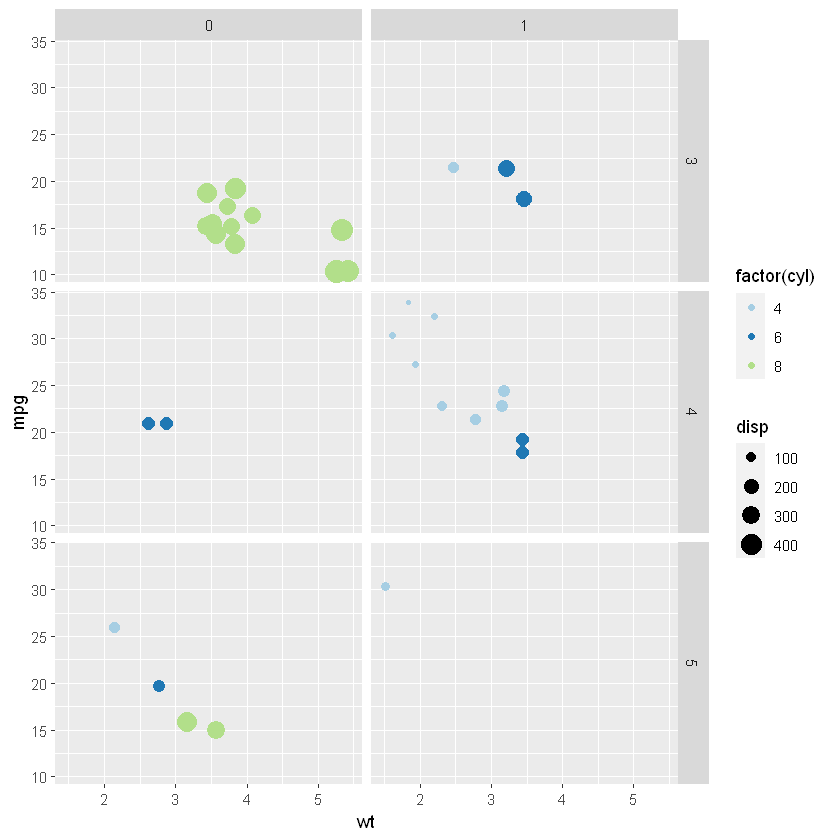

In [6]:
# Update the plot
ggplot(mtcars, aes(x = wt, y = mpg, color = factor(cyl), size = disp)) +
  geom_point() +
  scale_color_brewer(palette = "Paired") +
  # Grid facet on gear and vs
   facet_grid(rows = vars(gear), cols = vars(vs))

### Formula notation
As well as the vars() notation for specifying which variables should be used to split the dataset into facets, there is also a traditional formula notation. The three cases are shown in the table.

Modern notation -> Formula notation

facet_grid(rows = vars(A)) ->	facet_grid(A ~ .)

facet_grid(cols = vars(B)) ->	facet_grid(. ~ B)

facet_grid(rows = vars(A), cols = vars(B)) ->	facet_grid(A ~ B)

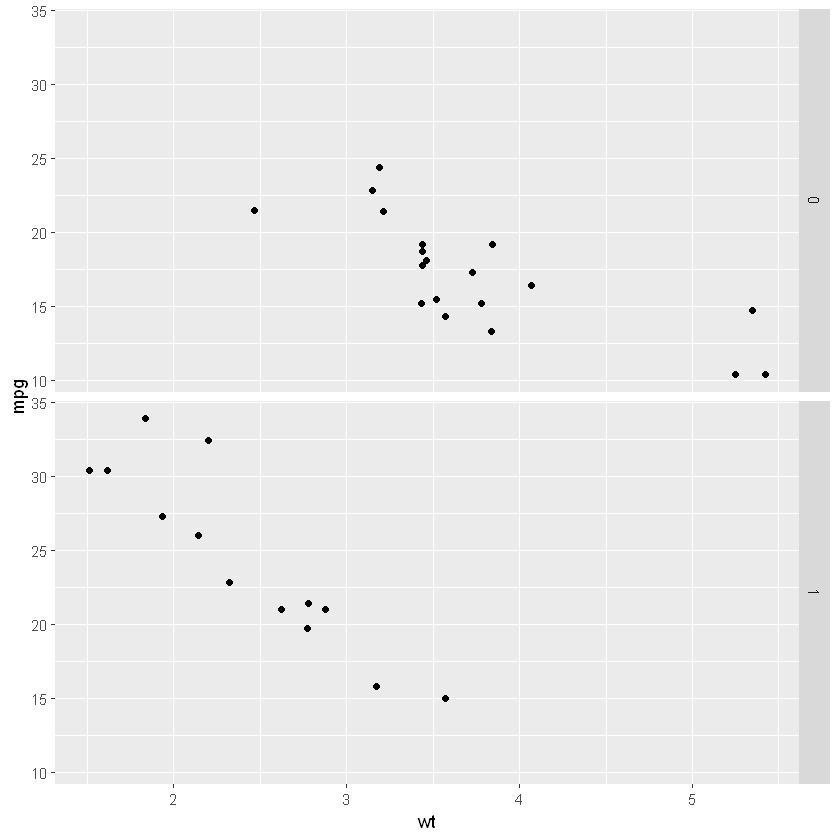

In [7]:
ggplot(mtcars, aes(wt, mpg)) + 
  geom_point() +
  # Facet rows by am using formula notation
  facet_grid(am ~ .)

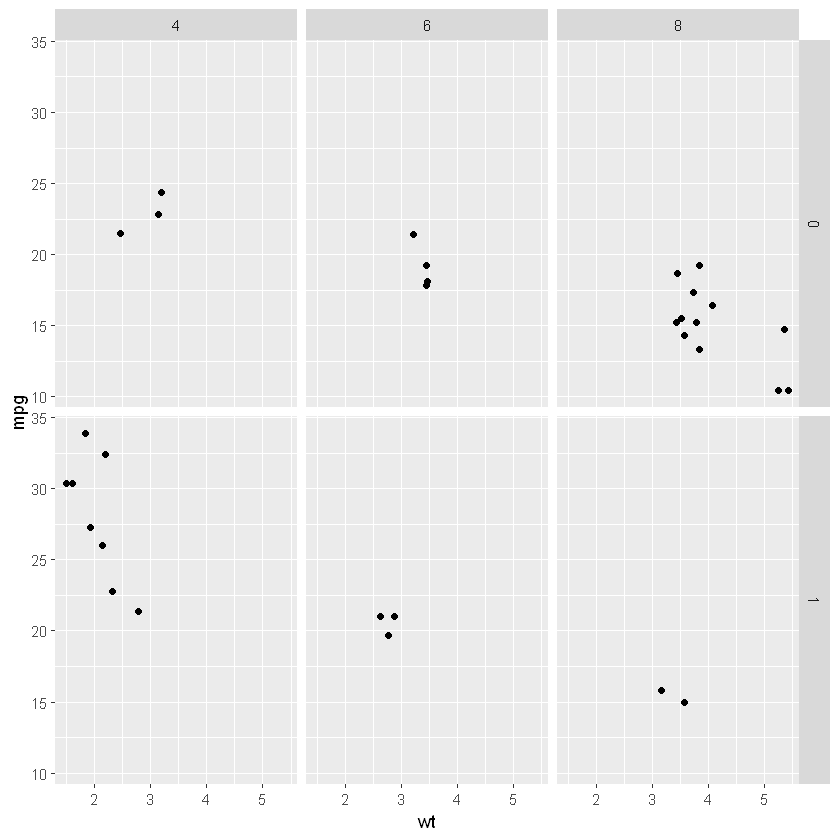

In [8]:
ggplot(mtcars, aes(wt, mpg)) + 
  geom_point() +
  # Facet rows by am and columns by cyl using formula notation
  facet_grid(am ~ cyl)

### Labeling facets
If your factor levels are not clear, your facet labels may be confusing. You can assign proper labels in your original data before plotting (see next exercise), or you can use the labeller argument in the facet layer.

The default value is

1. label_value: Default, displays only the value

Common alternatives are:

2. label_both: Displays both the value and the variable name
3. label_context: Displays only the values or both the values and variables depending on whether multiple factors are faceted

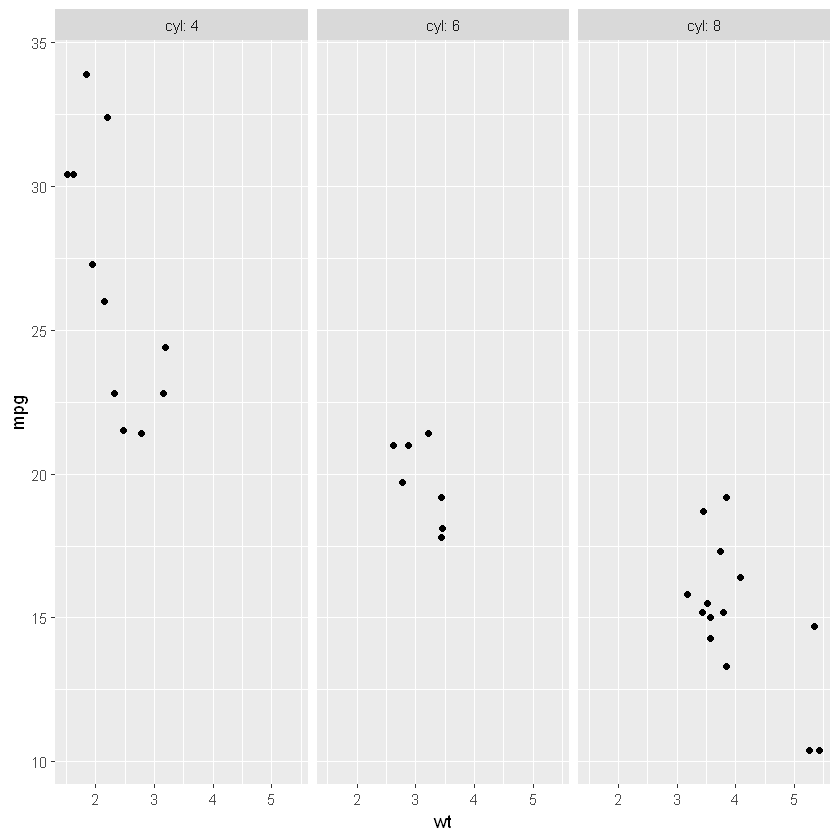

In [9]:
# Plot wt by mpg
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  # Displaying both the values and the variables
  facet_grid(cols = vars(cyl), labeller = label_both)

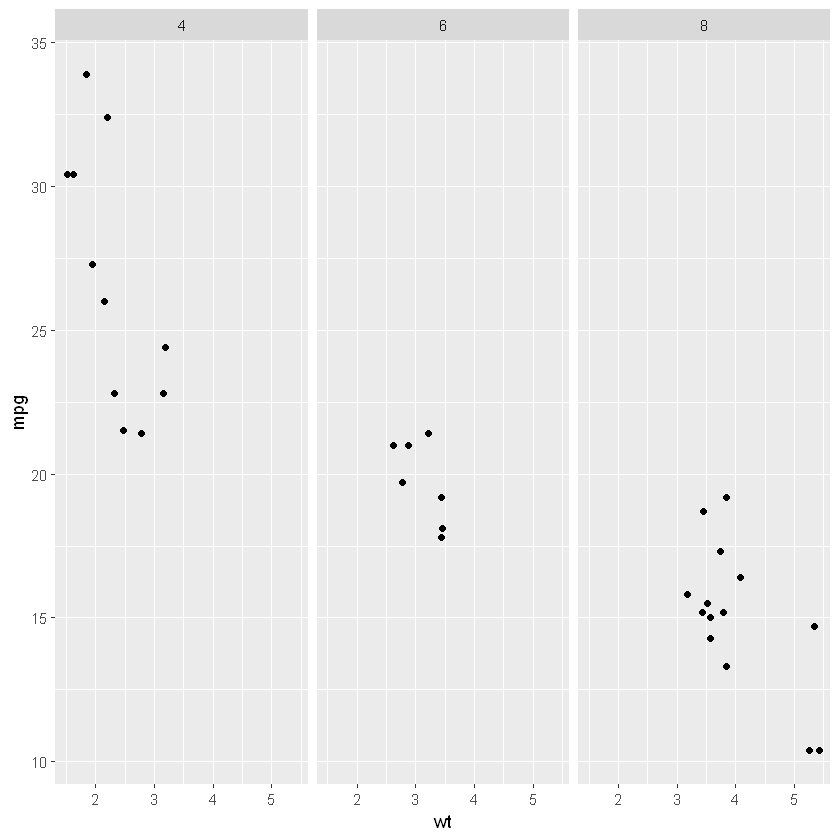

In [10]:
# Plot wt by mpg
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  # Label context
  facet_grid(cols = vars(cyl), labeller = label_context)

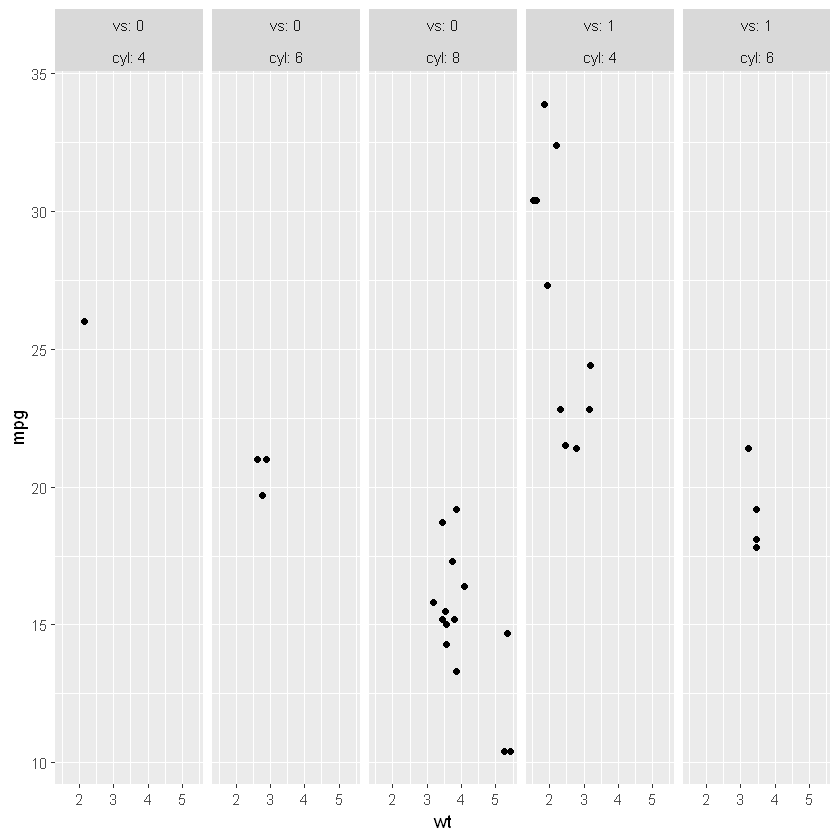

In [11]:
# Plot wt by mpg
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  # Two variables
  facet_grid(cols = vars(vs, cyl), labeller = label_context)

### Setting order
If you want to change the order of your facets, it's best to properly define your factor variables before plotting.

Let's see this in action with the mtcars transmission variable am. In this case, 0 = "automatic" and 1 = "manual".

Here, we'll make am a factor variable and relabel the numbers to proper names. The default order is alphabetical. To rearrange them we'll call fct_rev() from the forcats package to reverse the order.

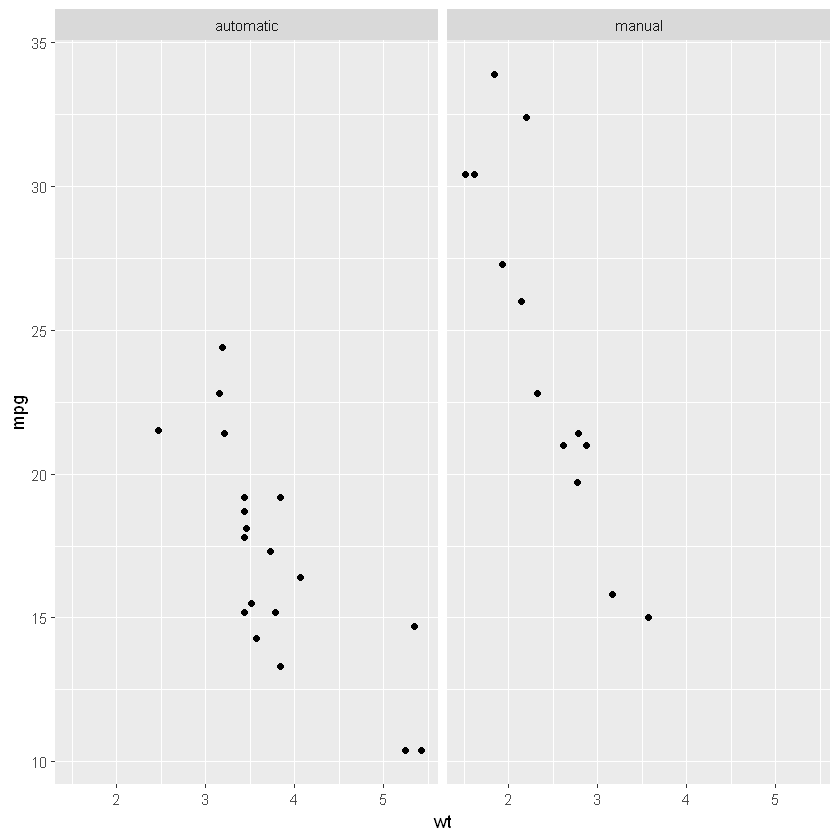

In [12]:
# Make factor, set proper labels explictly
mtcars$fam <- factor(mtcars$am, labels = c('0' = "automatic",
                                           '1' = "manual"))

# Default order is alphabetical
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  facet_grid(cols = vars(fam))

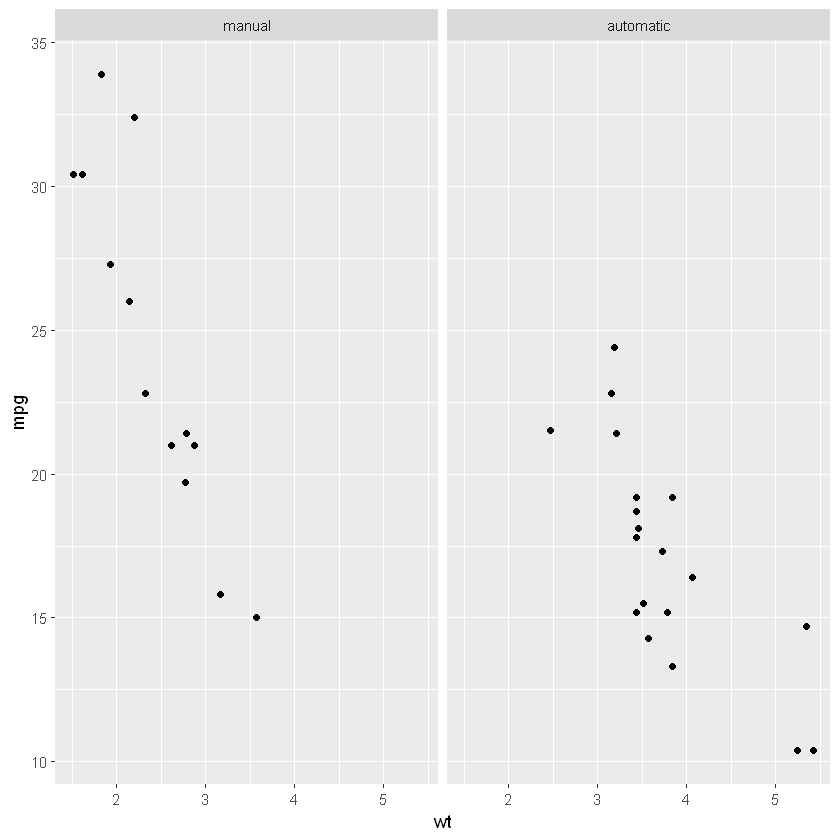

In [13]:
# Make factor, set proper labels explictly, and
# manually set the label order
mtcars$fam <- factor(mtcars$am,
                     levels = c(1, 0),
                     labels = c("manual", "automatic"))

# View again
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  facet_grid(cols = vars(fam))

### Variable plotting spaces I: continuous variables
By default every facet of a plot has the same axes. If the data ranges vary wildly between facets, it can be clearer if each facet has its own scale. This is achieved with the scales argument to facet_grid().

1. "fixed" (default): axes are shared between facets.
2. free: each facet has its own axes.
3. free_x: each facet has its own x-axis, but the y-axis is shared.
4. free_y: each facet has its own y-axis, but the x-axis is shared.

When faceting by columns, "free_y" has no effect, but we can adjust the x-axis. In contrast, when faceting by rows, "free_x" has no effect, but we can adjust the y-axis.

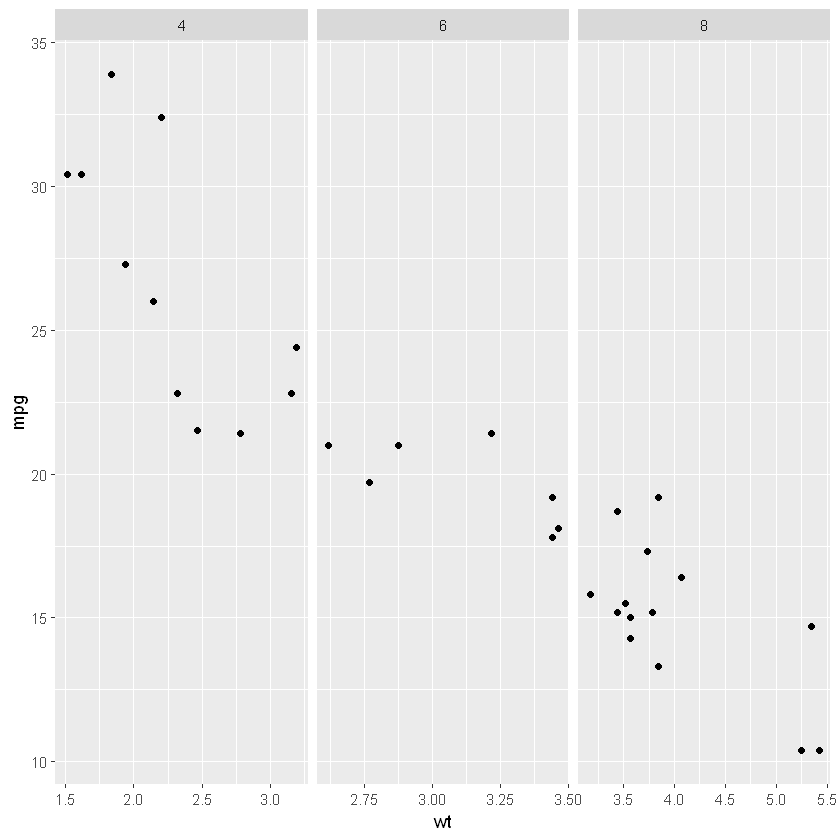

In [14]:
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() + 
  # Update the faceting to free the x-axis scales
  facet_grid(cols = vars(cyl), scales = "free_x")

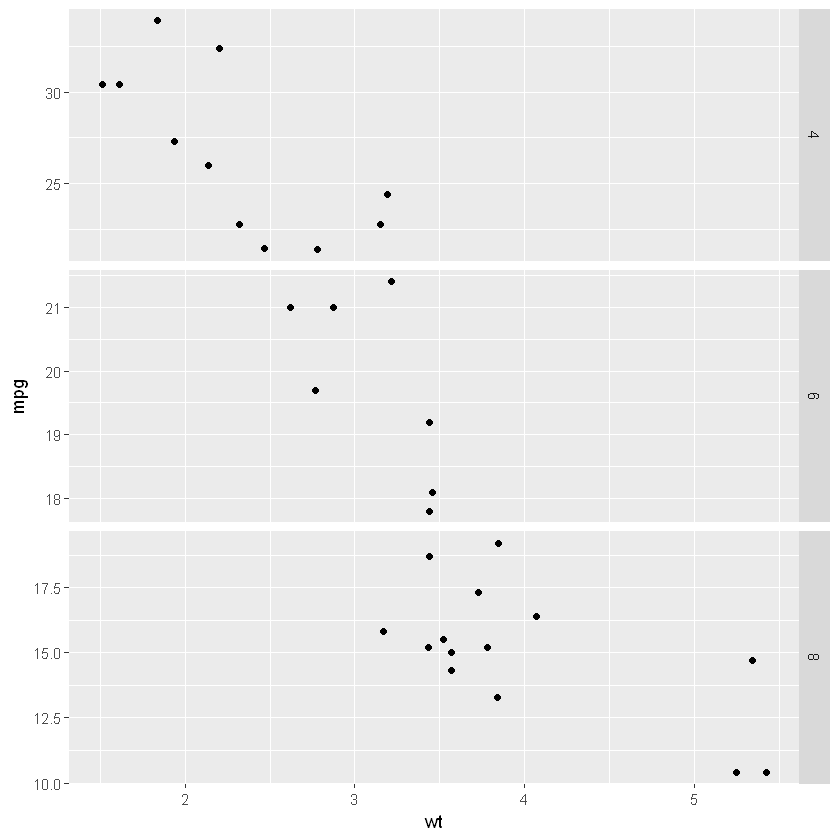

In [15]:
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() + 
  # Swap cols for rows; free the y-axis scales
  facet_grid(rows = vars(cyl), scales = "free_y")

### Variable plotting spaces II: categorical variables
When you have a categorical variable with many levels which are not all present in each sub-group of another variable, it's usually desirable to drop the unused levels.

By default, each facet of a plot is the same size. This behavior can be changed with the spaces argument, which works in the same way as scales: "free_x" allows different sized facets on the x-axis, "free_y", allows different sized facets on the y-axis, "free" allows different sizes in both directions.

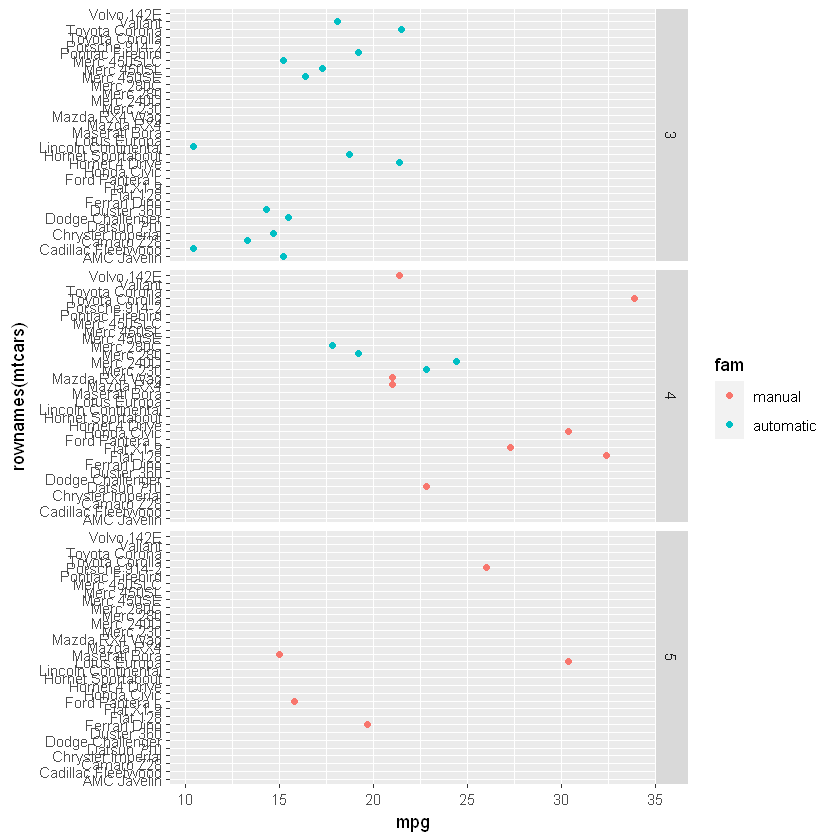

In [19]:
ggplot(mtcars, aes(x = mpg, y = rownames(mtcars), color = fam)) +
  geom_point() +
  # Facet rows by gear
  facet_grid(rows = vars(gear))

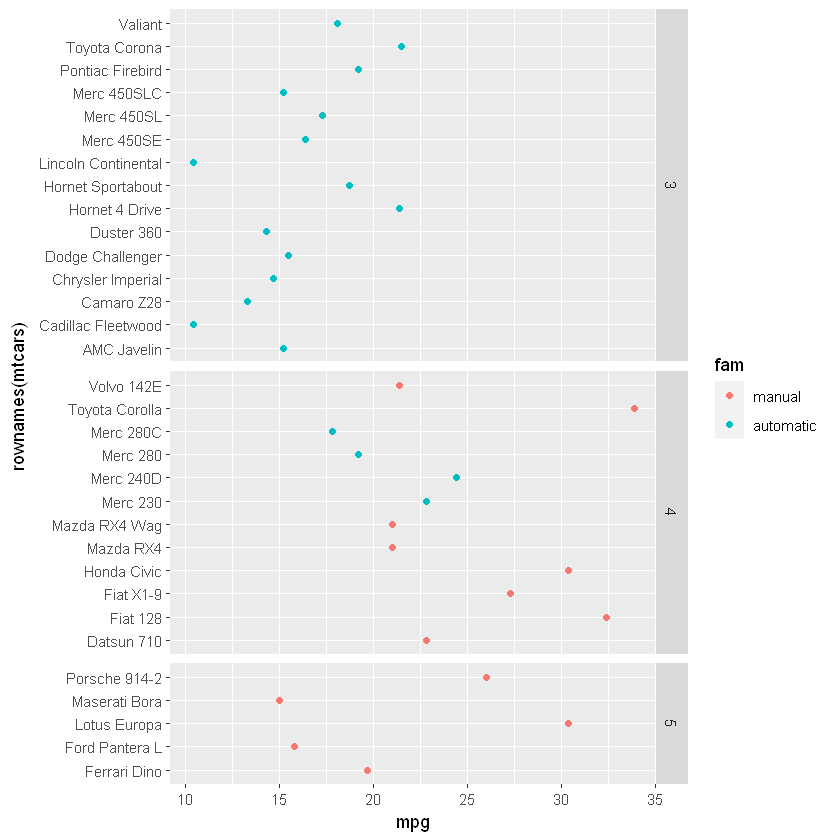

In [20]:
# To remove blank lines, set the scales and space arguments in facet_grid() to free_y.

ggplot(mtcars, aes(x = mpg, y = rownames(mtcars), color = fam)) +
  geom_point() +
  # Free the y scales and space
  facet_grid(rows = vars(gear), scales = "free_y", space = "free_y")

### Margin plots
Facets are great for seeing subsets in a variable, but sometimes you want to see both those subsets and all values in a variable.

Here, the margins argument to facet_grid() is your friend.

1. FALSE (default): no margins.

2. TRUE: add margins to every variable being faceted by.

3. c("variable1", "variable2"): only add margins to the variables listed.

To make it easier to follow the facets, we've created two factor variables with proper labels — fam for the transmission type, and fvs for the engine type, respectively.

Zoom the graphics window to better view your plots.

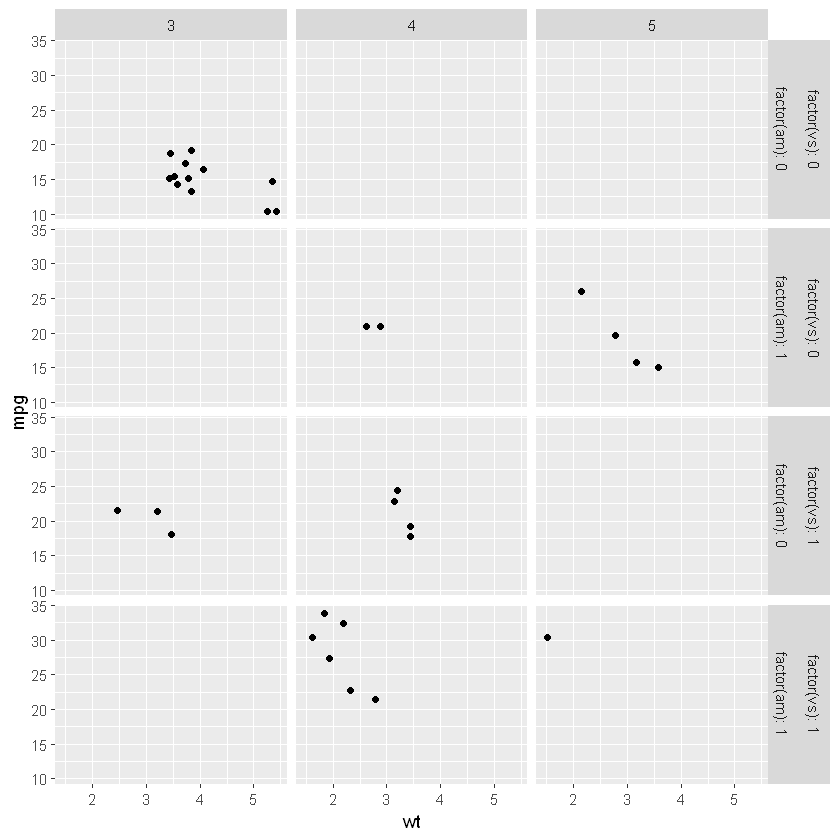

In [24]:
ggplot(mtcars, aes(x = wt, y = mpg)) + 
  geom_point() +
  # Facet rows by fvs and cols by fam
  facet_grid(rows = vars(factor(vs), factor(am)), cols = vars(gear), labeller = label_context)

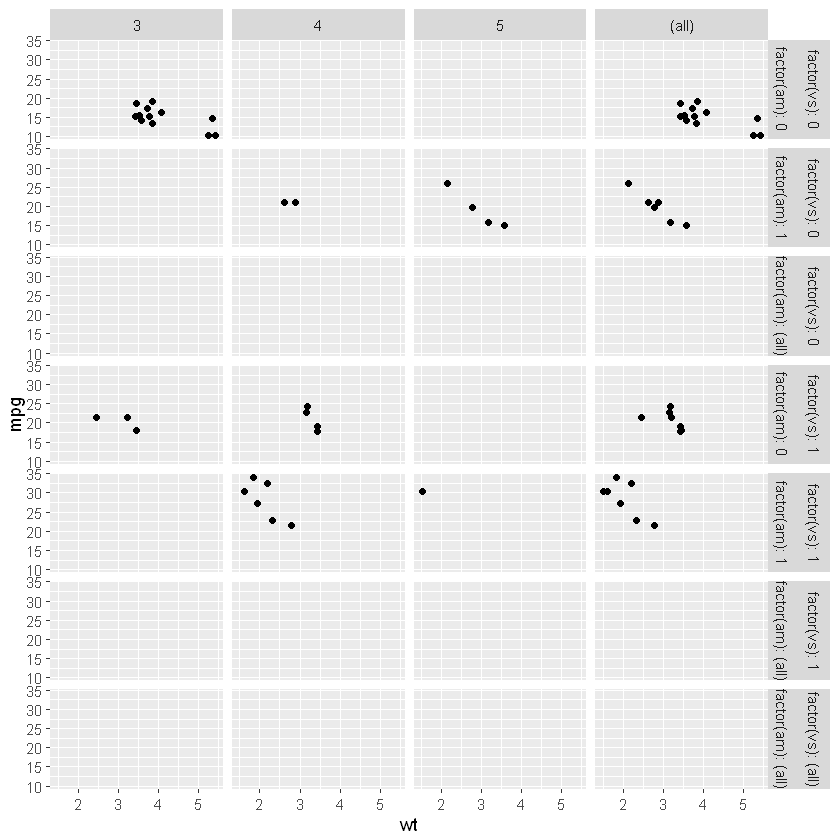

In [26]:
ggplot(mtcars, aes(x = wt, y = mpg)) + 
  geom_point() +
  # Update the facets to add margins
  facet_grid(rows = vars(factor(vs), factor(am)), cols = vars(gear), margins = TRUE, labeller = label_context)

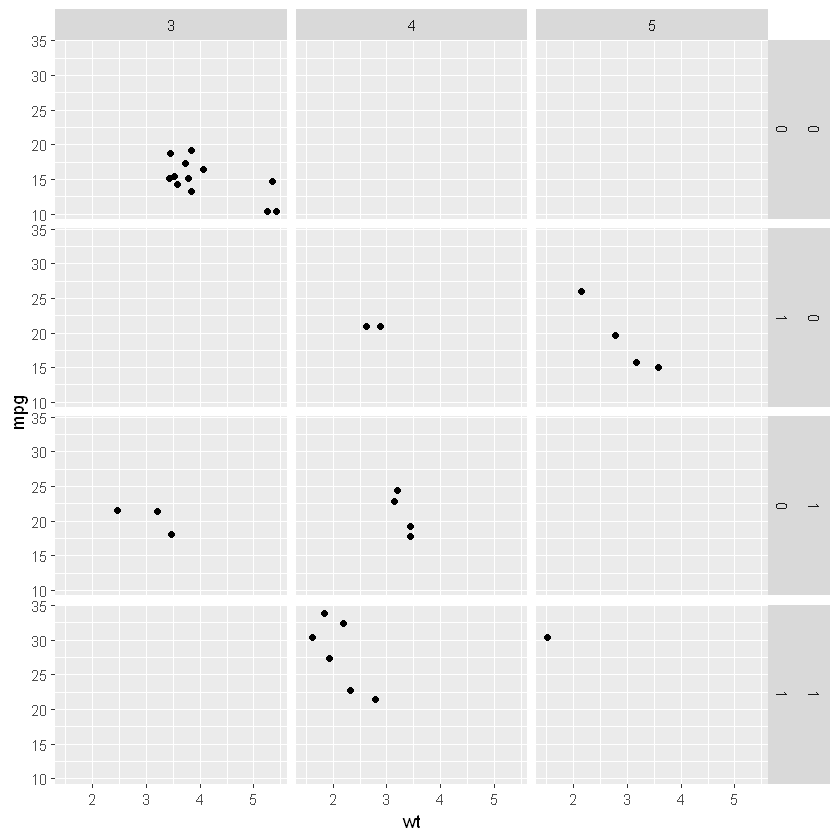

In [27]:
# Update the facets to only show margins on "fam".

ggplot(mtcars, aes(x = wt, y = mpg)) + 
  geom_point() +
  # Update the facets to only show margins on fam
  facet_grid(rows = vars(factor(vs), factor(am)), cols = vars(gear), margins = c("fam"))